In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from importlib import reload
plt.rcParams["legend.loc"] = "upper left"
plt.rcParams['text.usetex'] = True

from files.gradient_approximation import *
from files.optimizers import *
from files.sets import *
from files.utils import *
from files.run_experiments import *

%load_ext autoreload
%autoreload 2

In [ ]:
# Для тестирования

def learning_rate(k):
    return 1 / 100

TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**2)
GD.optimize()

make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

## None-stochastic FW LogReg on Simplex (Mushrooms)

In [60]:
func_name = "LogReg"
sett = Simplex()

d, args = init_experiment(func_name, dataset="Mushrooms")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [69]:
def learning_rate_jaguar(k):
    return (np.sqrt(k) + 1) / (k + 59000)

def learning_rate_lame(k):
    return 1 / (k + 50)

def learning_rate_turtle(k):
    return 1 / (k + 10)

In [70]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [71]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:20<00:00,  2.19it/s]


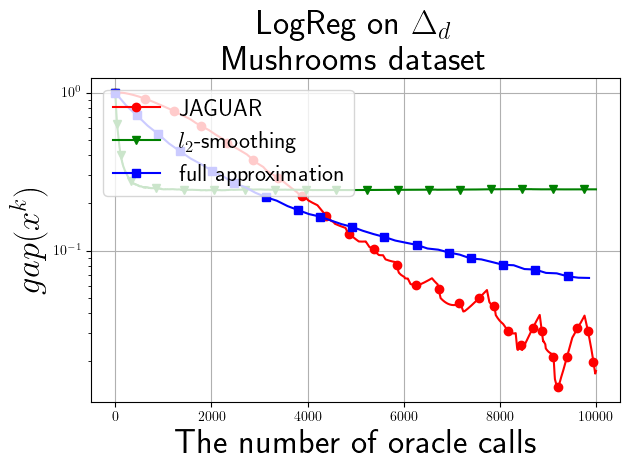

In [72]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_Simplex_Mushrooms")

## None-stochastic FW LogReg on Simplex (MNIST)

In [73]:
func_name = "LogReg"
sett = Simplex()

d, args = init_experiment(func_name, dataset="MNIST")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [74]:
def learning_rate_jaguar(k):
    return 1 / (k + 200)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 2 / (k + 10)

In [75]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [76]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [01:55<00:00, 19.22s/it]


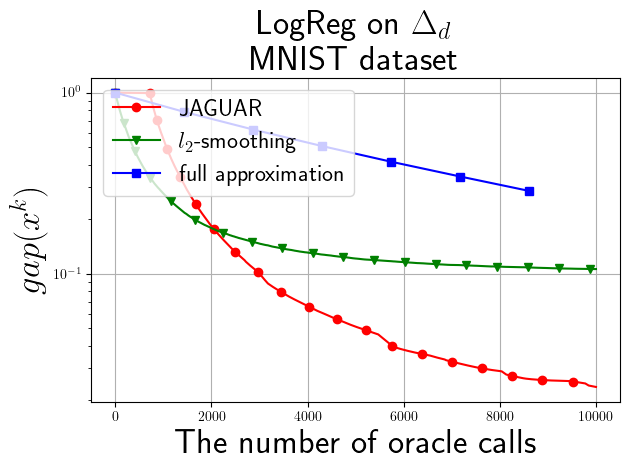

In [77]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_Simplex_MNIST")

## None-stochastic FW Reg on Simplex

In [78]:
func_name = "Reg"
sett = Simplex()
seed = 42
d = 200
L = 1000
mu = 1

d, args = init_experiment(func_name, d=d, L=L, mu=mu, seed=seed)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [83]:
def learning_rate_jaguar(k):
    return 1 / (k + 1000)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 100)

In [84]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [87]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**5, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 250/250 [00:02<00:00, 83.73it/s]


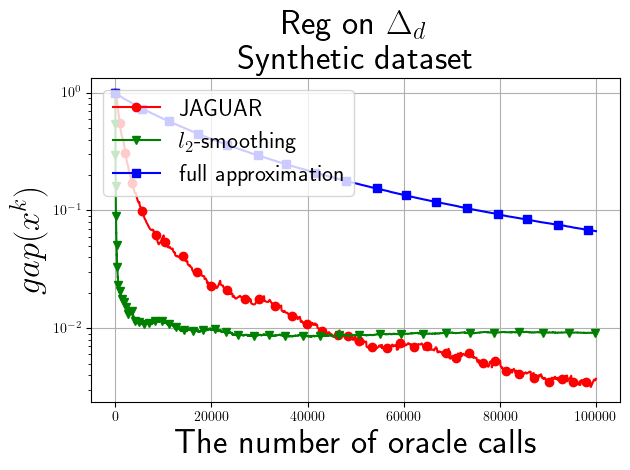

In [88]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_Reg_Simplex")

## None-stochastic FW SVM on Simplex (Mushrooms)

In [89]:
func_name = "SVM"
sett = Simplex()

d, args = init_experiment(func_name, dataset="Mushrooms", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [118]:
def learning_rate_jaguar(k):
    return 1 / (k + 2100)

def learning_rate_lame(k):
    return 1 / (k + 10)

def learning_rate_turtle(k):
    return 1 / (k + 26)

In [119]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [120]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:01<00:00, 27.89it/s]


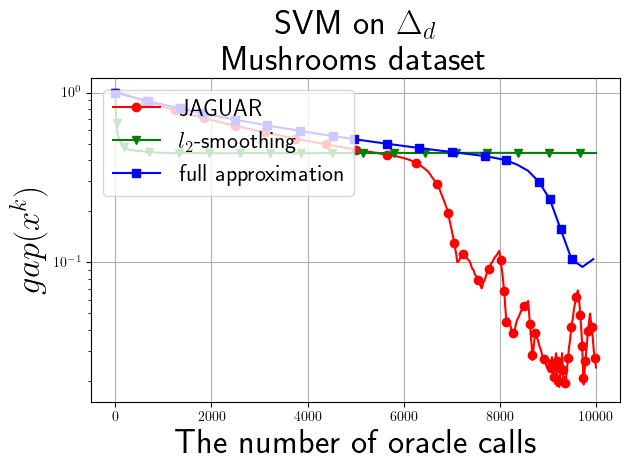

In [121]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_Simplex_Mushrooms")

## None-stochastic FW SVM on Simplex (MNIST)

In [122]:
func_name = "SVM"
sett = Simplex()

d, args = init_experiment(func_name, dataset="MNIST", alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [127]:
def learning_rate_jaguar(k):
    return 1 / (k + 1000)

def learning_rate_lame(k):
    return 1 / (2 * k + 10)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2.5 * k + 5)

In [128]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [131]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=8 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 5/5 [00:05<00:00,  1.18s/it]


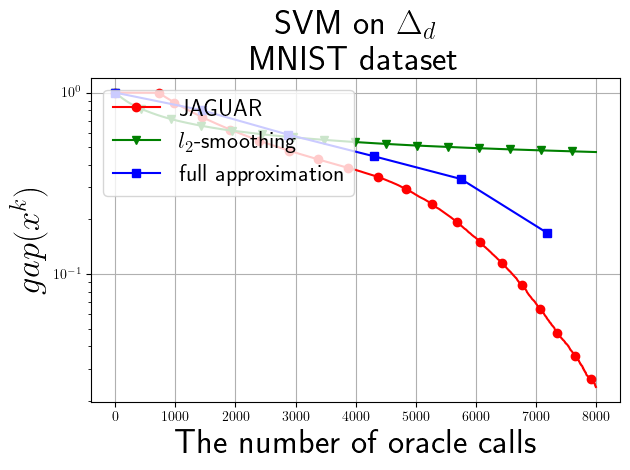

In [132]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_Simplex_MNIST")

## Stochastic OPF FW LogReg on Simplex (Mushrooms)

In [27]:
func_name = "LogReg"
sett = Simplex()
sigma = 1

d, args = init_experiment(func_name, dataset="Mushrooms")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [76]:
def learning_rate_jaguar(k):
    return 1 / (k + 200)

def learning_rate_lame(k):
    return 1 / (k + 10)

def learning_rate_turtle(k):
    return 1 / (k + 10)

In [77]:
def momentum_k(k):
    return 1 / (k + 600)

In [78]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [79]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:19<00:00,  2.30it/s]


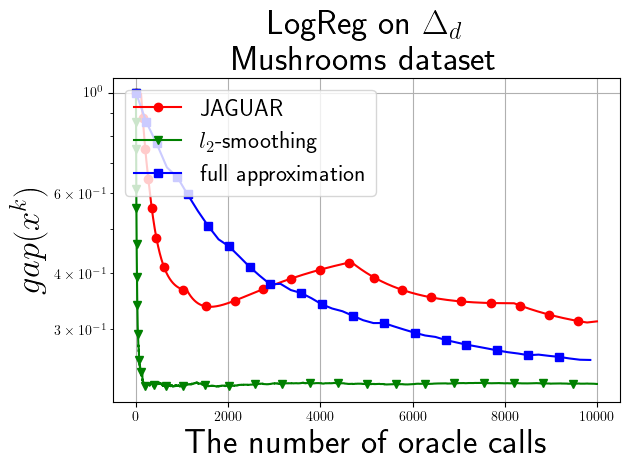

In [80]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_Simplex_Mushrooms")

## Stochastic OPF FW LogReg on Simplex (MNIST)

In [81]:
func_name = "LogReg"
sett = Simplex()
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [100]:
def learning_rate_jaguar(k):
    return 1 / (k + 40)

def learning_rate_lame(k):
    return 1 / (k + 100)

def learning_rate_turtle(k):
    return 1 / (k + 1)

In [101]:
def momentum_k(k):
    return 1 / (k + 50)

In [102]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [107]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=2 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 1/1 [00:18<00:00, 18.63s/it]


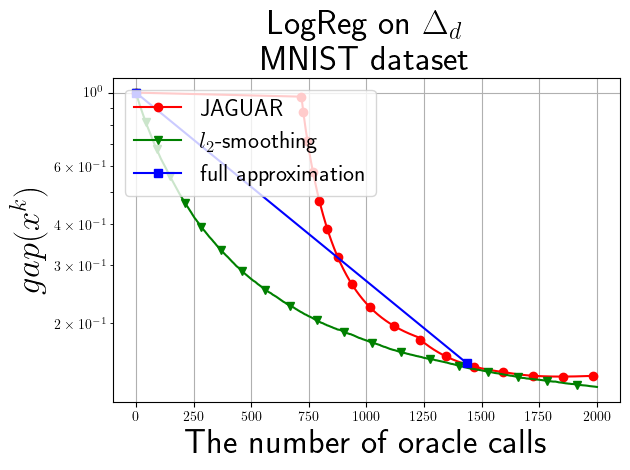

In [108]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_Simplex_MNIST")

## Stochastic OPF FW Reg on Simplex

In [109]:
func_name = "Reg"
sett = Simplex()
seed = 101
d = 200
L = 1000
mu = 1
sigma = 1

d, args = init_experiment(func_name, d=d, L=L, mu=mu, seed=seed)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [140]:
def learning_rate_jaguar(k):
    return 1 / (k + 1)

def learning_rate_lame(k):
    return 1 / (k + 1)

def learning_rate_turtle(k):
    return 1 / (k + 1)

In [169]:
def momentum_k(k):
    return 0.8 * k / (k + 10)

In [170]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [171]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 25/25 [00:00<00:00, 82.09it/s]


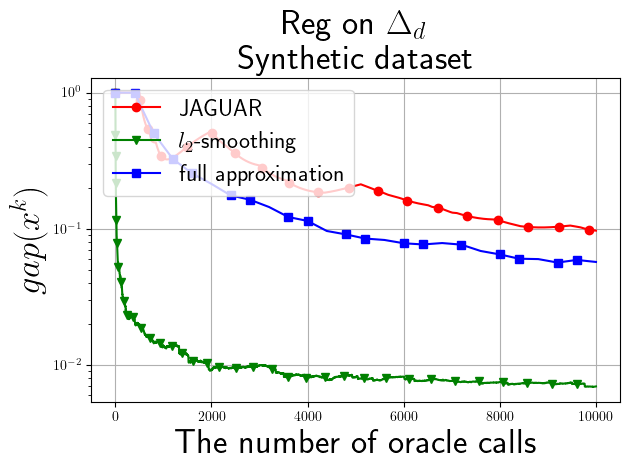

In [172]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_Reg_Simplex")

## Stochastic OPF FW SVM on Simplex (Mushrooms)

In [173]:
func_name = "SVM"
sett = Simplex()
sigma = 1

d, args = init_experiment(func_name, dataset="Mushrooms", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [186]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 6)

def learning_rate_turtle(k):
    return 1 / (k + 6)

In [187]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [188]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [189]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=2 * 10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 88/88 [00:02<00:00, 35.20it/s]


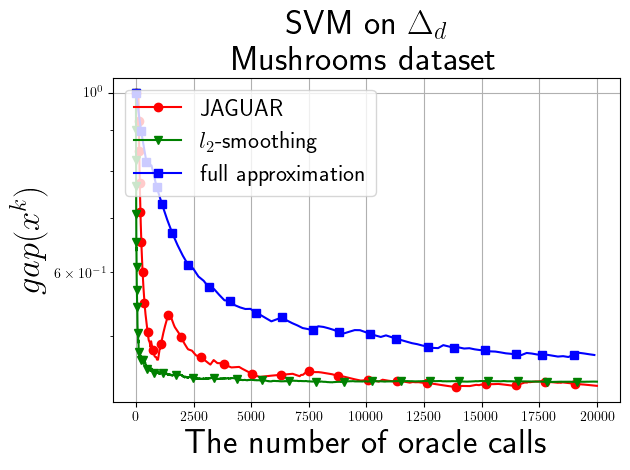

In [190]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_Simplex_Mushrooms")

## Stochastic OPF FW SVM on Simplex (MNIST)

In [191]:
func_name = "SVM"
sett = Simplex()
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [211]:
def learning_rate_jaguar(k):
    return 1 / (k + 20)

def learning_rate_lame(k):
    return 1 / (k + 10)

def learning_rate_turtle(k):
    return 1 / (k + 2)

In [212]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [213]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [218]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=6 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.08it/s]


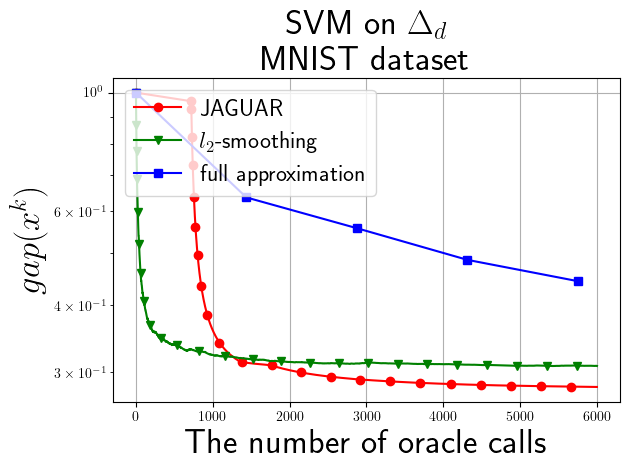

In [219]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_Simplex_MNIST")

## Stochastic TPF FW LogReg on Simplex (Mushrooms)

In [220]:
func_name = "LogReg"
sett = Simplex()
sigma = 1

d, args = init_experiment(func_name, dataset="Mushrooms")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [231]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 1)

def learning_rate_turtle(k):
    return 1 / (k + 3)

In [232]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [233]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [234]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=5 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [00:09<00:00,  2.28it/s]


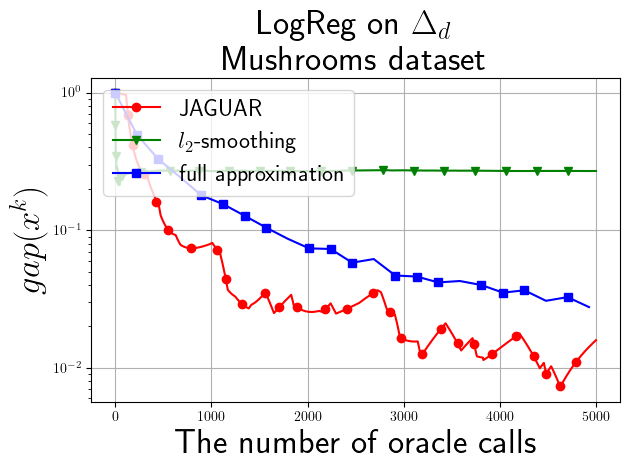

In [235]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_Simplex_Mushrooms")

## Stochastic TPF FW LogReg on Simplex (MNIST)

In [144]:
func_name = "LogReg"
sett = Simplex()
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [145]:
def learning_rate_jaguar(k):
    return 1 / (k + 500)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 2 / (k + 20)

In [146]:
def momentum_k(k):
    return k / (k + 50)

In [147]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [148]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [01:52<00:00, 18.71s/it]


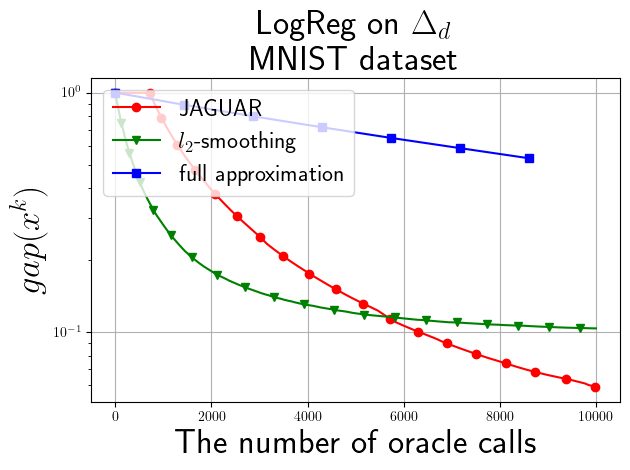

In [149]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_Simplex_MNIST")

## Stochastic TPF FW Reg on Simplex

In [176]:
func_name = "Reg"
sett = Simplex()
seed = 101
d = 200
L = 1000
mu = 1
sigma = 1

d, args = init_experiment(func_name, d=d, L=L, mu=mu, seed=seed)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [177]:
def learning_rate_jaguar(k):
    return 1 / (k + 10)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [178]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [179]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [180]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**5, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 250/250 [00:02<00:00, 86.49it/s]


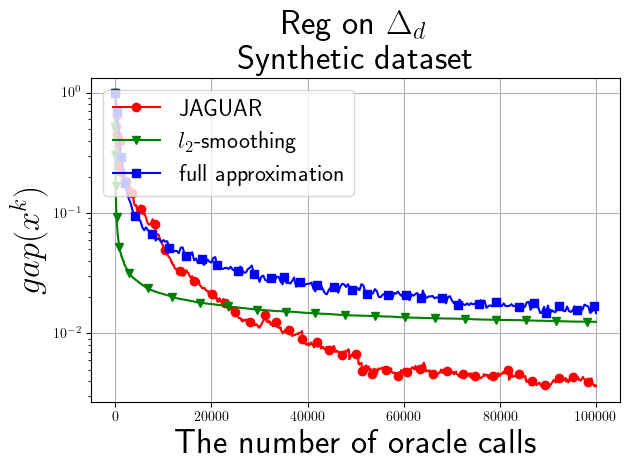

In [181]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_Reg_Simplex")

## Stochastic TPF FW SVM on Simplex (Mushrooms)

In [2]:
func_name = "SVM"
sett = Simplex()
sigma = 1

d, args = init_experiment(func_name, dataset="Mushrooms", alpha=4)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [23]:
def learning_rate_jaguar(k):
    return 1 / (k + 3000)

def learning_rate_lame(k):
    return 1 / (k + 5)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [24]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [25]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [26]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:03<00:00, 14.65it/s]


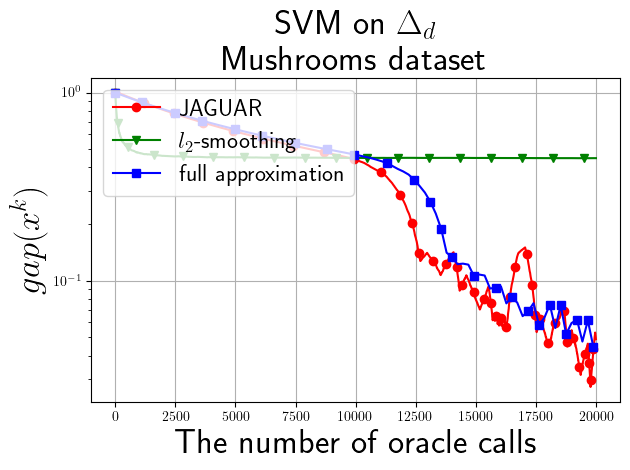

In [18]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_Simplex_Mushrooms")

## Stochastic TPF FW SVM on Simplex (MNIST)

In [251]:
func_name = "SVM"
sett = Simplex()
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [277]:
def learning_rate_jaguar(k):
    return 1 / (k + 1000)

def learning_rate_lame(k):
    return 1 / 300

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 7)

In [278]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [279]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [282]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=6 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.00s/it]


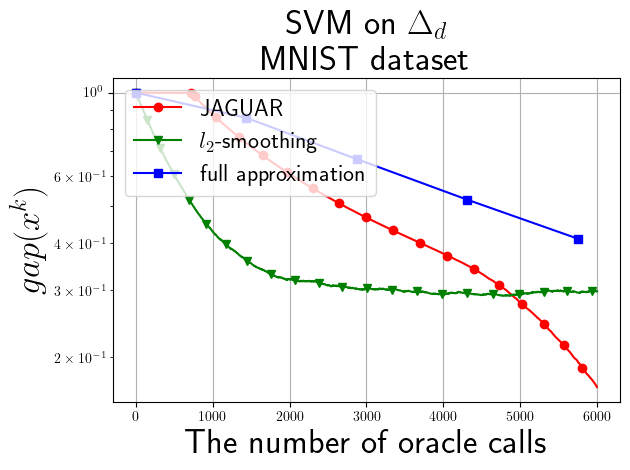

In [283]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_Simplex_MNIST")